<a href="https://colab.research.google.com/github/zaaachos/Thesis-Diagnostic-Captioning/blob/main/notebooks/ImageCLEF2022_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd 
dataset_path = '/content/drive/MyDrive/'
concepts_name_csvfile = dataset_path + '72d678c1-c535-491d-bc42-c2ba11f47165_concepts.csv'
caption_val_csvfile = dataset_path+'cc3d9c72-6c2b-4bd3-9d10-4e133031be48_ImageCLEFmedCaption_2022_caption_prediction_valid.csv'
caption_train_csvfile = dataset_path+'c856ae07-029b-449e-bd06-99c04d3ad1e0_ImageCLEFmedCaption_2022_caption_prediction_train.csv'
concept_val_csvfile = dataset_path+'46bff9d5-95d4-4362-be98-ef59819ec3af_ImageCLEFmedCaption_2022_concept_detection_valid.csv'
concept_train_csvfile = dataset_path+'b47c4f80-9432-408c-b69a-956a3382a0da_ImageCLEFmedCaption_2022_concept_detection_train.csv'
val_zipfile = dataset_path + 'e229cc37-d0da-4356-bd5c-f119c63dfacc_ImageCLEFmedCaption_2022_valid_images.zip'
train_zipfile = dataset_path + 'df47ac25-b3da-4365-bf8e-e2d056d5b28b_ImageCLEFmedCaption_2022_train_images.zip'

In [3]:
train_caption_df = pd.read_csv(caption_train_csvfile, sep='\t')
val_caption_df = pd.read_csv(caption_val_csvfile, sep='\t')
dataset = pd.concat([train_caption_df, val_caption_df]).reset_index(drop=True)

In [4]:
# # check if we unzipped zip files correctly by displaying some random images
# %matplotlib inline
# import matplotlib.pyplot as plt
# import numpy as np
# from PIL import Image
# import random
# from PIL import Image 

# images = []
# train_folder = '/content/drive/MyDrive/imageclef2022/imageclef2022_valid_images/valid/'
# for image in os.listdir(train_folder):
#     images.append(os.path.join(train_folder, image))

# plt.figure(1, figsize=(15, 9))
# plt.axis('off')
# n = 0
# for i in range(16):
#   n += 1
#   random_img = random.choice(images)
#   imgs = Image.open(random_img)
#   plt.subplot(4, 4, n)
#   plt.axis('off')
#   plt.imshow(imgs)

# plt.show()

In [5]:
import pandas as pd

# number of patients
train_caption_df = pd.read_csv(caption_train_csvfile, '\t')
print('# dataset images:', len(dataset))
print('# dataset unique captions:', len(dataset.caption.unique()))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


# dataset images: 90920
# dataset unique captions: 88342


In [6]:
mapper = dict( zip( train_caption_df.ID.to_list(), train_caption_df.caption.to_list() ) )

In [7]:
captions = dataset.caption.to_list()

In [8]:
import numpy as np
words_per_sent = list()
for caption in captions:
  tokenized_caption = caption.split()
  words_per_sent.append(len(tokenized_caption))

In [9]:
np.sum(np.array(words_per_sent)<50)

87622

In [10]:
print(len(np.array(words_per_sent)>80))

90920


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff4ea3e60d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff4ea3f2f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff4ea3f2750>],
 'medians': [<matplotlib.lines.Line2D at 0x7ff4ea3fca50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7ff4ea3fcf90>],
 'means': []}

<Figure size 2160x1080 with 0 Axes>

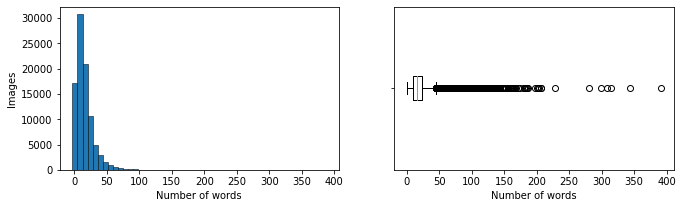

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=(11, 3))

ax1.hist(words_per_sent, bins=50, align='left', edgecolor='black',
              linewidth=0.5)
 
# Add axis labels
ax1.set(xlabel='Number of words', ylabel='Images')

 
# plt.show()
ax2.set(xlabel='Number of words', ylabel='')
ax2.set_yticklabels(' ')
ax2.boxplot(words_per_sent, vert=False)

In [12]:
dataset.describe()

,ID,caption
count,90920,90920
unique,90920,88342
top,ImageCLEFmedCaption_2022_train_000001,case a electrocardiogram with inferolateral ...
freq,1,261


In [13]:
print('Longest caption:', captions[np.argmax(words_per_sent)])
print('Most words in a single sentence:', words_per_sent[np.argmax(words_per_sent)])

Longest caption: in the meantime additional diagnostic workup perform two day prior to the  petct come back with positive chikungunya igg and igm serology give the patient recent travel to india the clinical course and positive chikungunya serology the patient abnormal  petct scan be most likely secondary to acute chikungunya infection and no lymph node biopsy be perform or further evaluation consider after  week of gradually decrease dosage of prednbeolone the patient return to her job as a cleaning lady but be still reliant on painmedication a followup  petct scan  day after end steroid treatment and  week after the first  petct show complete regression of the reactive lymph node as well as the  uptake in the left breast and only dbecrete  uptake of the right shoulder joint consbetent with the patient clinical improvement any linger suspicion of underlie lymphoma be therefore rebuke a needle biopsy from the left breast show chronic inflammation but no malignancy the chikungunya virus

In [14]:
print('mean number of words in captions:', round(np.mean(words_per_sent),2))

mean number of words in captions: 19.14


In [15]:
top20_frequent_captions_names = dataset["caption"].value_counts()[:10].index.tolist()
top20_frequent_captions_values = dataset["caption"].value_counts()[:10]
top20_frequent_captions_values

case  a  electrocardiogram with inferolateral early repolarization pattern with jpoint elevation and qrs slur after hypothermia treatment red arrow                                                                 261
case  telemetry tracing ventricular fibrillation precede by a ventricular extrasystole                                                                                                                              179
case  a a  electrocardiogram with an aggressive inferiorlateral er pattern during hypothermia treatment red arrow b the electrocardiogram be completely normalize after adminbetration of beoproterenol infusion    115
the degenerative nuclear atypic area ancient modification he                                                                                                                                                         61
chest xray                                                                                                                              

In [16]:
freqs_list = {}
for counts in dataset["caption"].value_counts():
  if counts in freqs_list:
    freqs_list[counts] += 1
  else:
    freqs_list[counts] = 1
from pprint import pprint
pprint(freqs_list)

{1: 87236,
 2: 848,
 3: 141,
 4: 44,
 5: 19,
 6: 13,
 7: 5,
 8: 3,
 9: 1,
 10: 6,
 11: 2,
 13: 4,
 14: 1,
 15: 2,
 16: 1,
 17: 3,
 21: 1,
 23: 1,
 29: 1,
 30: 2,
 32: 1,
 37: 2,
 48: 1,
 61: 1,
 115: 1,
 179: 1,
 261: 1}


In [17]:
print(round(freqs_list[1]/len(dataset),2))

0.96


In [18]:
# display info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90920 entries, 0 to 90919
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       90920 non-null  object
 1   caption  90920 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [19]:
# check for null objects
dataset.isna().sum()

ID         0
caption    0
dtype: int64

In [20]:
# get the caption with the highest frequency
print('Most frequent caption:', dataset.describe()['caption']['top'])

Most frequent caption: case  a  electrocardiogram with inferolateral early repolarization pattern with jpoint elevation and qrs slur after hypothermia treatment red arrow


In [21]:
# check words frequency with vocabulary
import tensorflow
import keras
from keras.preprocessing.text import Tokenizer
from collections import Counter
tokenizer = Tokenizer()
tokenizer.fit_on_texts(captions)
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 38354


In [22]:
for cap in captions:
  if 'pedal' in cap:
    print(cap)
    for word in cap.split():
      print(tokenizer.word_index[word])

digital subtraction angiography of the left pedal vessel
618
751
108
2
1
14
38342
246


In [23]:
from nltk.corpus import stopwords # Import the stop word list
from nltk.tokenize import wordpunct_tokenize
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [27]:
ordered = Counter(tokenizer.word_counts)
# top 10
print('Top10 frequent')
ordered.most_common(10)

Top10 frequent


[('the', 129758),
 ('of', 84428),
 ('show', 41364),
 ('and', 40003),
 ('a', 35811),
 ('in', 34437),
 ('with', 32688),
 ('be', 24649),
 ('arrow', 24555),
 ('right', 20340)]

In [29]:
word2freq = dict(ordered)
word2freq_sorted = sorted(word2freq.items(), key=lambda item:item[1], reverse=True)
word2freq_filtered = list(filter(lambda item: item[1]>=10, word2freq_sorted))
print('Vocabulary size (word\'s freq at least 10):', len(word2freq_filtered))

Vocabulary size (word's freq at least 10): 6516


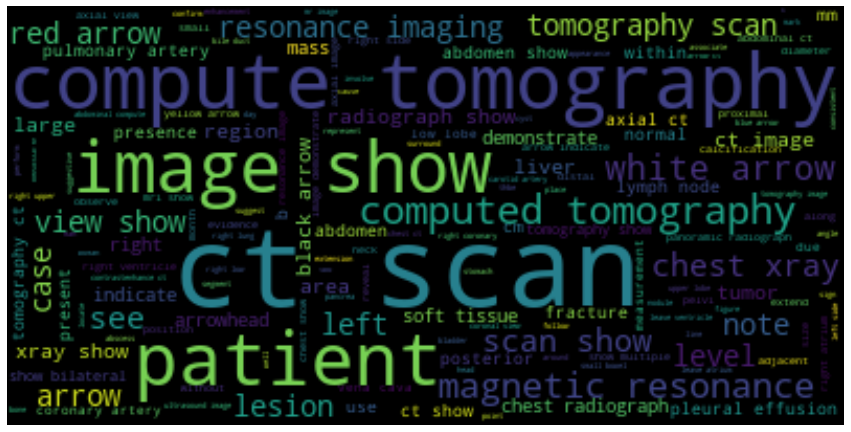

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(" ".join(cap for cap in captions))

# Display the generated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


## Now let's examine **concepts** with concepts' dictionary

In [34]:
# find most concepts

train_concepts_df = pd.read_csv(concept_train_csvfile, sep='\t')
val_concepts_df = pd.read_csv(concept_val_csvfile, sep='\t')
dataset_concepts = pd.concat([train_concepts_df, val_concepts_df]).reset_index(drop=True)

concepts = train_concepts_df.cuis.to_list()
print('Most concepts in a single instance (train):', len(max(concepts).split(';')))
print('Longest concept:', max(concepts))

concepts_dataset = dataset_concepts.cuis.to_list()
print('Most concepts in a single instance (dataset):', len(max(concepts_dataset).split(';')))
print('Longest concept:', max(concepts_dataset))

Most concepts in a single instance (train): 8
Longest concept: C4688305;C0577559;C0444706;C1261075;C2348529;C1699633;C0006826;C0046056
Most concepts in a single instance (dataset): 8
Longest concept: C4688305;C0577559;C0444706;C1261075;C2348529;C1699633;C0006826;C0046056


In [35]:
dataset_concepts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90920 entries, 0 to 90919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      90920 non-null  object
 1   cuis    90920 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [36]:
# check for null objects
dataset_concepts.isna().sum()

ID      0
cuis    0
dtype: int64

In [37]:
# get the concept with the highest frequency
print('Most frequent concept:', dataset_concepts.describe()['cuis']['top'])

Most frequent concept: C0040405


In [39]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(concepts_dataset)
vocab_size = len(tokenizer.word_index) + 1
print('# concepts: %d' % vocab_size)

# concepts: 8375


In [38]:
ordered = Counter(tokenizer.word_counts)
# top 10
print('Top10 frequent')
ordered.most_common(10)

Top10 frequent


[('the', 129758),
 ('of', 84428),
 ('show', 41364),
 ('and', 40003),
 ('a', 35811),
 ('in', 34437),
 ('with', 32688),
 ('be', 24649),
 ('arrow', 24555),
 ('right', 20340)]

In [40]:
concept2freq = dict(ordered)
concept2freq_sorted = sorted(concept2freq.items(), key=lambda item:item[1], reverse=True)
concept2freq_filtered = list(filter(lambda item: item[1]>=10, concept2freq_sorted))
print('Concepts size (concept\'s freq at least 10):', len(concept2freq_filtered))

Concepts size (concept's freq at least 10): 6516


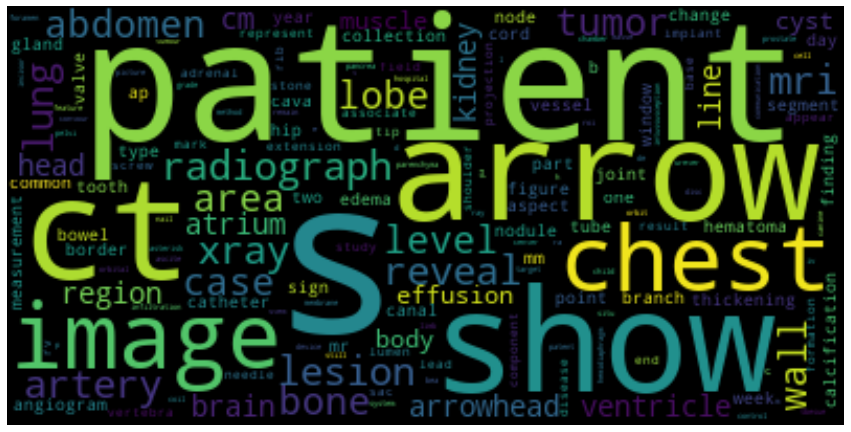

In [41]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(" ".join(cap[0] for cap in concept2freq_sorted))

# Display the generated image:
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
concepts_name_df = pd.read_csv(concepts_name_csvfile, sep='\t')
concepts_name_df.head()

,concept,concept_name
0,C2825493,Non-Enhancing Lesion
1,C0922672,Right lateral rectus
2,C1167956,Cardiac Resynchronization Therapy
3,C0030288,Pancreatic duct
4,C0815700,Right obturator internus


In [44]:
concepts_name_df.describe()

,concept,concept_name
count,8374,8374
unique,8374,8374
top,C2825493,Non-Enhancing Lesion
freq,1,1


In [45]:
concepts_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8374 entries, 0 to 8373
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   concept       8374 non-null   object
 1   concept_name  8374 non-null   object
dtypes: object(2)
memory usage: 131.0+ KB


In [46]:
ordered = Counter(tokenizer.word_counts)
# top 20
top20_concepts = ordered.most_common(20)
names = [item[0].upper() for item in top20_concepts]
freqs = [item[1] for item in top20_concepts]


concept = concepts_name_df.concept.to_list()
concept_name = concepts_name_df.concept_name.to_list()
mapper = dict(zip(concept, concept_name))

xtext = [mapper[name] for name in names]
mapper2 = dict(zip(xtext, freqs))
mapper2


{'X-Ray Computed Tomography': 28885,
 'Plain x-ray': 26412,
 'Magnetic Resonance Imaging': 15693,
 'Ultrasonography': 12236,
 'Chest': 8030,
 'angiogram': 6464,
 'Abdomen': 6243,
 'Bone structure of cranium': 5175,
 'Lesion': 4094,
 'Axial': 3528,
 'Pelvis': 3404,
 'Bilateral': 3124,
 'Lower Extremity': 2753,
 'Mass of body structure': 2497,
 'Sagittal': 2243,
 'Left': 1856,
 'Right': 1665,
 'Implants': 1564,
 'Measured': 1542,
 'Contrast Media': 1524}

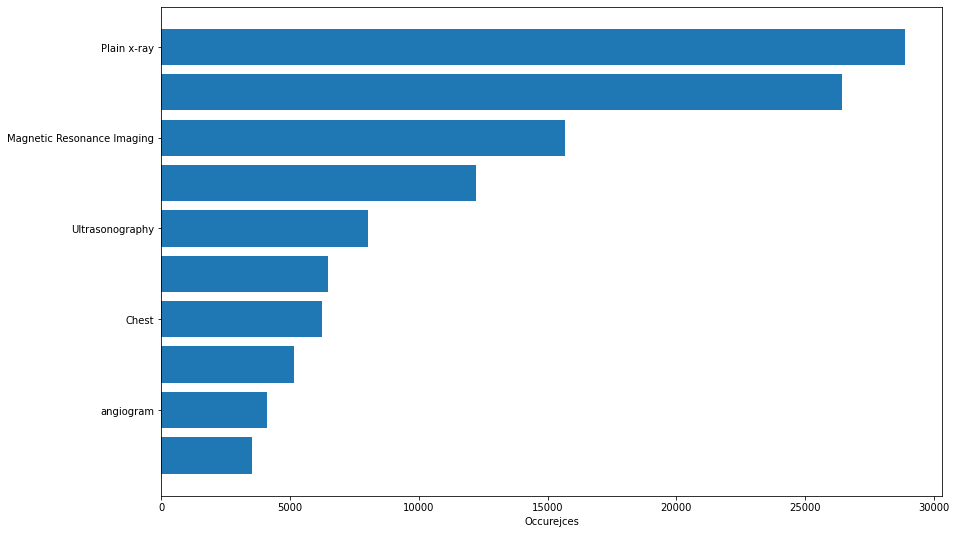

In [47]:
import numpy as np
y_pos = np.arange(10)

fig, ax = plt.subplots(figsize=(14, 9))
ax.barh(y_pos, list(mapper2.values())[:10],  align='center')
ax.set_yticklabels(list(mapper2.keys())[:10])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Occurejces')

plt.show()

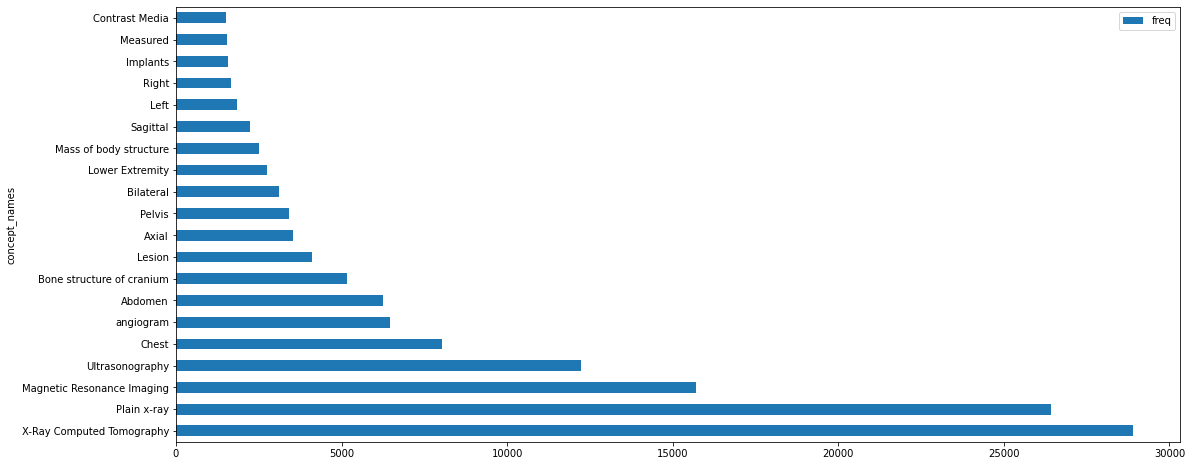

In [48]:
df = pd.DataFrame(list(mapper2.items()),
                      columns=['concept_names','freq'])
df.plot.barh(x='concept_names', y='freq', figsize=(18,8))